In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pth_dict = {
    4: {
        "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/410m/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl"
    },

    2: {
        "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-12b/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
    }
}

def load_dfs(pth_dict):
    dfs = {}
    for k, v in pth_dict.items():
        dfs[k] = {}
        for model, pth in v.items():
            with open(pth, "rb") as f:
                dfs[k][model] = pickle.load(f)[model]
    return dfs

dfs = load_dfs(pth_dict)

In [3]:
# threshold  by alignment score
def filtering(data, alignment_threshold=0.9):
    sorted_data = data.sort_values(['bleu', 'value'], ascending=False)
    filtered_data = sorted_data[ sorted_data['alignment_score'] > alignment_threshold ]
    return filtered_data

filtered_dfs = {}
for k, v in dfs.items():
    filtered_dfs[k] = {}
    for model, df in v.items():
        filtered_dfs[k][model] = filtering(df)

In [4]:
filtered_dfs[2]["pythia-12b"]

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,alignment_score,query,sum,count,id,gold,src,ref,result,bleu
1207,enough space,suficiente espacio,710,"{'translation': {'en': 'Two extremes, between ...",en-es,"(enough space, suficiente espacio)","Two extremes, between which there is enough sp...",0.959105,0.912433,"{'translation': {'en': 'Two extremes, between ...",717,2,3024_0,0,"Two extremes, between which there is enough sp...","Dos extremos, entre los cuales hay suficiente ...","Dos extremos, entre los cuales hay suficiente...",76.043218
892,The interpretation,La interpretación,1857,{'translation': {'en': 'The interpretation of ...,en-es,"(The interpretation, La interpretación)",The interpretation of the dominant position on...,0.959105,0.964657,{'translation': {'en': 'The interpretation of ...,5493,5,789_0,0,The interpretation of the dominant position on...,La interpretación sobre la posición dominante ...,La interpretación de la posición dominante en...,60.867010
895,dominant position,posición dominante,1068,{'translation': {'en': 'The interpretation of ...,en-es,"(dominant position, posición dominante)",The interpretation of the dominant position on...,0.959105,0.955925,{'translation': {'en': 'The interpretation of ...,5493,5,789_0,0,The interpretation of the dominant position on...,La interpretación sobre la posición dominante ...,La interpretación de la posición dominante en...,60.867010
454,thousand customers,mil clientes,459,{'translation': {'en': 'Over the course of mer...,en-es,"(thousand customers, mil clientes)","Over the course of merely half a year, this op...",0.959105,0.944828,{'translation': {'en': 'Over the course of mer...,23345,9,1815_0,0,"Over the course of merely half a year, this op...","Tan sólo tras medio año, este operador consigu...","Durante el transcurso de sólo un año, este op...",53.664420
935,And playing,Y jugar,19,{'translation': {'en': 'And playing music is o...,en-es,"(And playing, Y jugar)",And playing music is one of the biggest energy...,0.959105,0.903461,{'translation': {'en': 'And playing music is o...,5143,4,1429_0,0,And playing music is one of the biggest energy...,Y la reproducción de música es uno de los mayo...,Y jugar música es uno de los mayores consumid...,46.154155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,could influence,podría influir,196,"{'translation': {'en': 'Namely, by doing this ...",en-es,"(could influence, podría influir)","Namely, by doing this they want to calm invest...",0.959105,0.918436,"{'translation': {'en': ""Namely, by doing this ...",5431,8,839_0,0,"Namely, by doing this they want to calm invest...",Quieren con ello tranquilizar los negocios de ...,"En particular, haciendo esto quieren calmar a...",4.053985
1278,regulatory organs,organismos reguladores,161,{'translation': {'en': 'But considering this a...,en-es,"(regulatory organs, organismos reguladores)",But considering this approach by the mobile op...,0.959105,0.950387,{'translation': {'en': 'But considering this a...,473,4,574_0,0,But considering this approach by the mobile op...,Es por esto que este acceso a los operadores d...,Pero considerando esta estrategia por parte d...,3.652946
224,parliament elections,elecciones parlamentarias,1335,{'translation': {'en': 'According to the first...,en-es,"(parliament elections, elecciones parlamentarias)",According to the first preliminary results of ...,0.959105,0.933772,{'translation': {'en': 'According to the first...,68064,37,2007_0,0,According to the first preliminary results of ...,Las elecciones anticipadas al parlamento austr...,Las primeras encuestas preliminares de las el...,3.309411
238,many reasons,muchas razones,1895,"{'translation': {'en': 'In spite of this, ther...",en-es,"(many reasons, muchas razones)","In spite of this, there are many reasons to ge...",0.959105,0.981559,"{'translation': {'en': 'In spite of this, ther...",64200,4,1934_0,0,"In spite of this, there are many reasons to ge...",Aún 

In [5]:
# select the examples per source 
# value_sum = data_model[['src', 'value']].groupby('src').sum()['value'].rename('value_sum')
# alignment_min = data_model[['src', 'alignment_score']].groupby('src').min()['alignment_score'].rename('alignment_min')
# blue_min = data_model[['src', 'bleu']].groupby('src').min()['bleu'].rename('bleu_min')
# lang_1 = data_model[['src', 'lang_1']].groupby('src')['lang_1'].apply(list)
# lang_2 = data_model[['src', 'lang_2']].groupby('src')['lang_2'].apply(list)
# value_list = data_model[['src', 'value']].groupby('src')['value'].apply(list).rename('value_list')

In [6]:
# concatenate results
# concat_df = pd.concat([value_sum, value_list, lang_1, lang_2, alignment_min, blue_min], axis=1)
# concat_df = concat_df.reset_index()

In [7]:
# merge with original data
# sel_df = data_model[['src', 'ref', 'result']].drop_duplicates()

# merge_df = concat_df.merge(sel_df, on='src', how='left')
# merge_df['n_pairs'] = merge_df['lang_1'].apply(len)

In [8]:
def group_by_src(data_model):
    # groups by src and select sum values. add them as list/min/sum

    # select the examples per source 
    value_sum = data_model[['src', 'value']].groupby('src').sum()['value'].rename('value_sum')
    alignment_min = data_model[['src', 'alignment_score']].groupby('src').min()['alignment_score'].rename('alignment_min')
    blue_min = data_model[['src', 'bleu']].groupby('src').min()['bleu'].rename('bleu_min')
    lang_1 = data_model[['src', 'lang_1']].groupby('src')['lang_1'].apply(list)
    lang_2 = data_model[['src', 'lang_2']].groupby('src')['lang_2'].apply(list)
    value_list = data_model[['src', 'value']].groupby('src')['value'].apply(list).rename('value_list')

    # concatenate results
    concat_df = pd.concat([value_sum, value_list, lang_1, lang_2, alignment_min, blue_min], axis=1)
    concat_df = concat_df.reset_index()

    # merge with original data
    sel_df = data_model[['src', 'ref', 'result']].drop_duplicates()

    merge_df = concat_df.merge(sel_df, on='src', how='left')
    merge_df['n_pairs'] = merge_df['lang_1'].apply(len)

    return merge_df 

In [9]:
# create our goruped dfs
grouped_dfs = {}
for k, v in filtered_dfs.items():
    grouped_dfs[k] = {}
    for model, df in v.items():
        grouped_dfs[k][model] = group_by_src(df)

In [10]:
# merge the two dataframes and compmute blue difference
def compare_models(data_1, data_2, suffix_1, suffix_2):
    compared_df = data_1.merge(data_2, on='src', how='inner', suffixes=(f'_{suffix_1}', f'_{suffix_2}'))
    compared_df['blue_diff'] = np.abs(compared_df['bleu_min_{}'.format(suffix_1)] - compared_df['bleu_min_{}'.format(suffix_2)])
    compared_df['n_pairs_ratio'] = np.abs(compared_df['n_pairs_{}'.format(suffix_1)] / compared_df['n_pairs_{}'.format(suffix_2)])
    return compared_df

In [11]:
compared_df = compare_models(grouped_dfs[4]['pythia-12b'], grouped_dfs[4]['pythia-410m'], '4', '2')

In [12]:
sorted_compare_df = compared_df.sort_values(['blue_diff','bleu_min_4'], ascending=False)
sorted_compare_df.head(10)

,src,value_sum_4,value_list_4,lang_1_4,lang_2_4,alignment_min_4,bleu_min_4,ref_4,result_4,n_pairs_4,...,value_list_2,lang_1_2,lang_2_2,alignment_min_2,bleu_min_2,ref_2,result_2,n_pairs_2,blue_diff,n_pairs_ratio
15,"For Elena it's the first time, for Luca it's t...",133,"[131, 2]","[the third or fourth, its the third or]","[la tercera o cuarta, es la tercera o]",0.913267,69.845023,"Para Elena es la primera vez, para Luca ya la ...","Para Elena es la primera vez, para Luca es la...",2,...,"[11, 2]","[the third or fourth, its the third or]","[el tercero o cuarto, es el tercero o]",0.912779,11.643948,"Para Elena es la primera vez, para Luca ya la ...","Para Elena, es el primer tiempo, para Luca, e...",2,58.201075,1.000000
19,How is it possible that the prices in Czechia ...,34,"[23, 9, 2]","[high in comparison with, possible that the pr...","[altos en comparación con, posible que los pre...",0.930345,73.632034,¿Cómo es posible que los precios en la Repúbli...,¿Cómo es posible que los precios en Checoslov...,3,...,[12],[possible that the prices],[posible que el precio],0.904436,15.545245,¿Cómo es posible que los precios en la Repúbli...,¿Cómo es posible que el precio de la energía ...,1,58.086789,3.000000
20,"I feel responsible for her death.""",28,"[21, 7]","[responsible for her death, I feel responsible...","[responsable de su muerte., Me siento responsa...",0.915386,86.687790,"Me siento responsable de su muerte.""",Me siento responsable de su muerte.,2,...,[51],[responsible for her death],[responsable de su muerte],0.969602,36.701246,"Me siento responsable de su muerte.""",Estoy responsable de su muerte,1,49.986544,2.000000
37,Now there is a new policy of engagement.,284,[284],[a new policy of],[una nueva política de],0.962473,70.710678,Ahora hay una nueva política de colaboración.,Ahora hay una nueva política de compromiso.,1,...,[32],[a new policy of],[La nueva política de],0.910203,22.772101,Ahora hay una nueva política de colaboración.,La nueva política de la inversión.,1,47.938577,1.000000
71,With a victory on the accommodatingly flat cou...,2,[2],[With a victory on],[Con una victoria en],0.922725,45.981707,Tras la victoria en el acomodadiza carrera en ...,Con una victoria en el camino plano de 2:03:5...,1,...,[2],[With a victory on],[Con una victoria en],0.922725,5.447511,Tras la victoria en el acomodadiza carrera en ...,Con una victoria en el camino de la acordeada...,1,40.534196,1.000000
65,The young man with the exhibitionist attitude ...,57,"[55, 2]","[his first time at, and its his first]","[su primera vez en, y es su primera]",0.908879,43.256783,Un chico joven que se comporta de modo exhibic...,El joven de la actitud exhibicionista se llam...,2,...,[889],[The young man with],[a young man with],0.948031,3.425102,Un chico joven que se comporta de modo exhibic...,Bob is a young man with a very attractive att...,1,39.831681,2.000000
51,The interpretation of the dominant position on...,247,"[131, 104, 4, 4, 2, 2]","[on the market is, of the dominant position, m...","[en el mercado es, de la posición dominante, m...",0.904649,60.867010,La interpretación sobre la posición dominante ...,La interpretación de la posición dominante en...,6,...,[104],[of the dominant position],[de la posición dominante],0.938413,21.893997,La interpretación sobre la posición dominante ...,El dominio de la posición dominante es uno de...,1,38.973013,6.000000
29,"In this way, music players (particularly the s...",7,[7],[are much more efficient],[son mucho más eficientes.],0.933224,36.827066,"En este sentido, los reproductores de música (...","De esta manera, los reproductores de música (...",1,...,"[557, 20, 17]","[are much more efficient, ones are much more, ...","[are much more efficient., ones) are much more...",0.953228,2.711020,"En este sentido, los reproductores de música (...","In this way, music players (particularly the ...",3,34.116046,0.333333
70,"Wednesday, October 1, 2008 will be written int...",10213,[10213],[into the history of],[en 

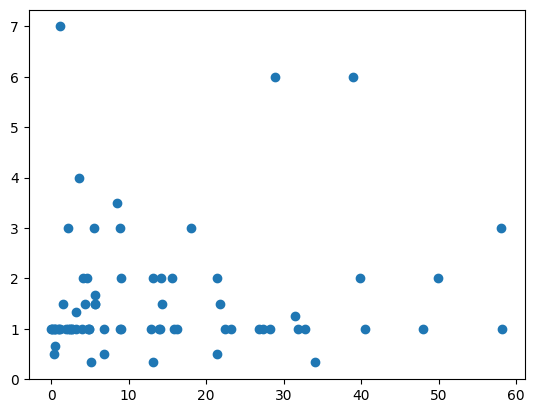

In [14]:
plt.scatter(compared_df['blue_diff'],compared_df['n_pairs_ratio'])